# BBCA.JK — Colab Notebook (Yahoo Finance)

> Jalankan sel berurutan. Notebook ini mengambil data langsung dari Yahoo Finance tanpa download manual, mem-*flatten* MultiIndex menjadi kolom biasa, dan menyediakan opsi ekspor per kolom.

In [ ]:
#@title 1) Install & Import
# (Hanya perlu sekali saja per sesi)
# Jika error jaringan, jalankan ulang sel ini.
!pip install --quiet yfinance pandas numpy matplotlib scikit-learn
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import yfinance as yf
pd.set_option("display.max_columns", 50)
print("Libraries ready.")

Libraries ready.


In [ ]:
#@title 2) Unduh Data BBCA.JK dari Yahoo Finance
ticker = "BBCA.JK"  #@param {type:"string"}
period = "5y"       #@param ["1y","3y","5y","10y","max"]
interval = "1d"     #@param ["1d","1wk","1mo"]

df = yf.download(ticker, period=period, interval=interval, auto_adjust=False)
# Jika MultiIndex (Price x Ticker), flatten jadi single-level
if isinstance(df.columns, pd.MultiIndex):
    # opsi 1: droplevel untuk buang level ticker (karena hanya satu ticker)
    df.columns = df.columns.droplevel(1)
# Pastikan kolom Date ada
df = df.reset_index()
# Rapikan nama kolom: hilangkan spasi
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
print(df.head())
print("\nKolom:", list(df.columns))
print(len(df), "baris")

[*********************100%***********************]  1 of 1 completed

        Date    Adj_Close   Close    High     Low    Open     Volume
0 2020-11-02  5151.486816  5820.0  5825.0  5720.0  5760.0  151006500
1 2020-11-03  5213.446777  5890.0  5895.0  5835.0  5840.0   78152000
2 2020-11-04  5151.486816  5820.0  5940.0  5785.0  5900.0   78626000
3 2020-11-05  5443.581543  6150.0  6180.0  5900.0  5900.0  161090000
4 2020-11-06  5576.352051  6300.0  6300.0  6060.0  6160.0  137303500

Kolom: ['Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']
1203 baris


In [ ]:
#@title 3) (Opsional) Alternatif: yf.Ticker().history()
# Cara lain agar langsung single-index kolom.
use_history = False  #@param {type:"boolean"}
if use_history:
    bbca = yf.Ticker("BBCA.JK")
    df = bbca.history(period=period, interval=interval, auto_adjust=False).reset_index()
    df.columns = [c.strip().replace(" ", "_") for c in df.columns]
    print(df.head())
    print("\nKolom:", list(df.columns))
    print(len(df), "baris")

## Pecah Per Kolom
Bagian ini mengekstrak setiap kolom menjadi *Series* atau menyimpannya ke file terpisah (jika dibutuhkan).

In [ ]:
#@title 4) Akses Kolom & Simpan Per-Kolom (opsional)
# Pilihan: Simpan masing-masing kolom ke CSV terpisah
save_each_column = True  #@param {type:"boolean"}
base_name = "bbca"        #@param {type:"string"}

# Pastikan kolom standar ada (bergantung pada auto_adjust)
available = list(df.columns)
print("Kolom tersedia:", available)

# Contoh mengambil masing-masing kolom sebagai Series
Date = df["Date"]
Open = df["Open"] if "Open" in df else None
High = df["High"] if "High" in df else None
Low  = df["Low"]  if "Low"  in df else None
Close = df["Close"] if "Close" in df else None
Adj_Close = df["Adj_Close"] if "Adj_Close" in df else None
Volume = df["Volume"] if "Volume" in df else None

if save_each_column:
    for col in ["Date","Open","High","Low","Close","Adj_Close","Volume"]:
        if col in df.columns:
            df[[col]].to_csv(f"{base_name}_{col.lower()}.csv", index=False)
            print("Saved:", f"{base_name}_{col.lower()}.csv")

Kolom tersedia: ['Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'ret', 'vol_21', 'SMA5', 'SMA20', 'RSI14', 'ret1', 'target_up']
Saved: bbca_date.csv
Saved: bbca_open.csv
Saved: bbca_high.csv
Saved: bbca_low.csv
Saved: bbca_close.csv
Saved: bbca_adj_close.csv
Saved: bbca_volume.csv


## EDA Sederhana

In [ ]:
#@title 5) Ringkasan & Cek Missing
print("Missing values per kolom:")
print(df.isna().sum())
print("\nDeskripsi:")
display(df.describe(include='all'))

Missing values per kolom:
Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Deskripsi:


,Date,Adj_Close,Close,High,Low,Open,Volume
count,1203,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1.203000e+03
mean,2023-04-24 19:45:02.244389120,7852.102070,8362.468828,8437.842893,8290.989194,8364.355777,9.245272e+07
min,2020-11-02 00:00:00,5151.486816,5820.000000,5825.000000,5720.000000,5760.000000,1.065390e+07
25%,2022-01-20 12:00:00,6752.000488,7400.000000,7475.000000,7350.000000,7400.000000,5.796995e+07
50%,2023-04-12 00:00:00,8052.238770,8550.000000,8625.000000,8475.000000,8550.000000,7.738200e+07
75%,2024-07-27 12:00:00,8801.543945,9200.000000,9262.500000,9125.000000,9200.000000,1.061742e+08
max,2025-10-29 00:00:00,10570.414062,10950.000000,10950.000000,10775.000000,10900.000000,7.564316e+08
std,NaN,1340.741447,1221.838161,1227.046824,1216.771379,1220.284457,6.548472e+07


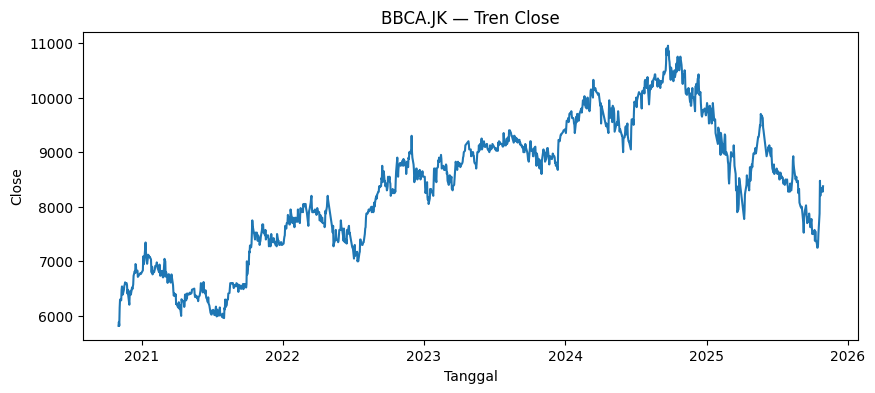

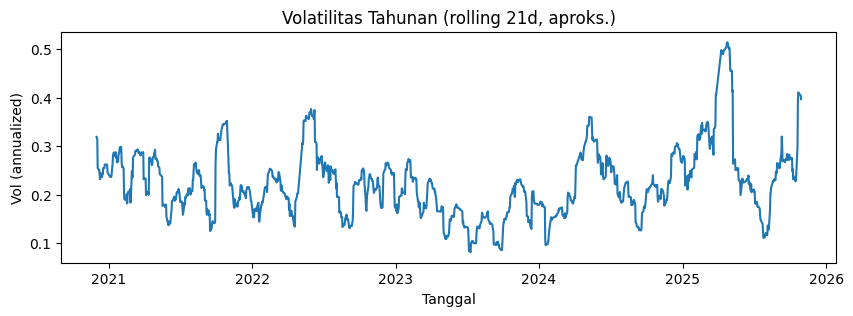

In [ ]:
#@title 6) Plot Tren Close & Volatilitas Rolling
if "Close" in df.columns:
    plt.figure(figsize=(10,4))
    plt.plot(df["Date"], df["Close"])
    plt.title("BBCA.JK — Tren Close")
    plt.xlabel("Tanggal"); plt.ylabel("Close")
    plt.show()

    # Return & volatilitas rolling (21 hari)
    df["ret"] = df["Close"].pct_change()
    df["vol_21"] = df["ret"].rolling(21).std() * np.sqrt(252)
    plt.figure(figsize=(10,3))
    plt.plot(df["Date"], df["vol_21"])
    plt.title("Volatilitas Tahunan (rolling 21d, aproks.)")
    plt.xlabel("Tanggal"); plt.ylabel("Vol (annualized)")
    plt.show()
else:
    print("Kolom Close tidak tersedia (cek auto_adjust atau sumber data).")

,Date,Close,SMA5,SMA20,RSI14
1198,2025-10-23,8325.0,8075.0,7622.50,63.443020
1199,2025-10-24,8275.0,8230.0,7655.00,61.952654
1200,2025-10-27,8350.0,8325.0,7683.75,63.343675
1201,2025-10-28,8275.0,8285.0,7716.25,60.944145
1202,2025-10-29,8375.0,8320.0,7760.00,62.958936


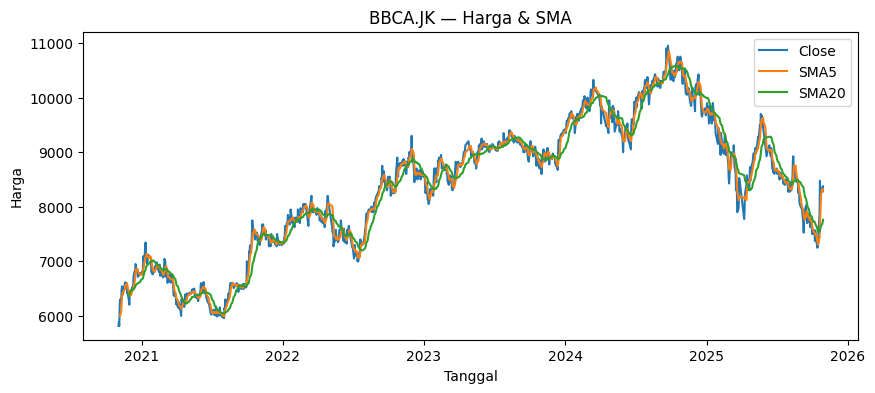

In [ ]:
# Pilih kolom harga yang ada: Close / Adj Close
candidates = ['Close', 'Adj Close', 'Adj_Close']
price_col = next((c for c in candidates if c in df.columns), None)
if price_col is None:
    raise ValueError("Kolom harga tidak ditemukan. Cek df.columns terlebih dahulu.")

def rsi(series, period=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    ma_up = up.ewm(alpha=1/period, adjust=False).mean()
    ma_down = down.ewm(alpha=1/period, adjust=False).mean()
    rs = ma_up / (ma_down + 1e-9)
    return 100 - (100 / (1 + rs))

# Hitung indikator
df['SMA5']  = df[price_col].rolling(5).mean()
df['SMA20'] = df[price_col].rolling(20).mean()
df['RSI14'] = rsi(df[price_col], 14)

# Tampilkan sample hasil
display(df[['Date', price_col, 'SMA5', 'SMA20', 'RSI14']].tail())

# Plot harga + SMA
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df[price_col], label=price_col)
plt.plot(df['Date'], df['SMA5'],  label='SMA5')
plt.plot(df['Date'], df['SMA20'], label='SMA20')
plt.title('BBCA.JK — Harga & SMA')
plt.xlabel('Tanggal'); plt.ylabel('Harga')
plt.legend()
plt.show()


In [ ]:
# Pastikan kolom ini sudah ada: 'Close','SMA5','SMA20','RSI14'
# Target: naik besok
df['target_up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Probabilitas naik saat kondisi teknikal tertentu
cond_zone = (df['SMA5'] > df['SMA20']) & (df['RSI14'].between(40, 60))
p_up_cond = df.loc[cond_zone, 'target_up'].mean()

# Baseline: probabilitas naik tanpa syarat
p_up_base = df['target_up'].mean()

# Volatilitas 21 hari
df['ret'] = df['Close'].pct_change()
df['vol_21'] = df['ret'].rolling(21).std() * np.sqrt(252)

# Filter volatilitas: gunakan 80th percentile sebagai ambang
vol_thr = df['vol_21'].quantile(0.80)
low_vol = df['vol_21'] <= vol_thr

# Prob naik saat kondisi teknikal + volatilitas rendah
p_up_cond_lowvol = df.loc[cond_zone & low_vol, 'target_up'].mean()

print("Baseline P(up):", round(p_up_base, 3))
print("P(up | SMA5>SMA20 & 40<=RSI<=60):", round(p_up_cond, 3))
print("P(up | kondisi + vol <= P80):", round(p_up_cond_lowvol, 3))
print("Ambang volatilitas P80:", round(vol_thr, 4))
print("Jumlah sampel (kondisi):", int(cond_zone.sum()),
      "| (kondisi+low vol):", int((cond_zone & low_vol).sum()))


Baseline P(up): 0.445
P(up | SMA5>SMA20 & 40<=RSI<=60): 0.442
P(up | kondisi + vol <= P80): 0.449
Ambang volatilitas P80: 0.2713
Jumlah sampel (kondisi): 328 | (kondisi+low vol): 267


## Indikator Teknis (SMA & RSI)

In [ ]:
# #@title 7) Hitung Indikator SMA & RSI
# def rsi(series, period=14):
#     delta = series.diff()
#     up = delta.clip(lower=0)
#     down = -1*delta.clip(upper=0)
#     ma_up = up.ewm(alpha=1/period, adjust=False).mean()
#     ma_down = down.ewm(alpha=1/period, adjust=False).mean()
#     rs = ma_up / (ma_down + 1e-9)
#     return 100 - (100 / (1 + rs))

# if "Close" in df.columns:
#     df["SMA5"] = df["Close"].rolling(5).mean()
#     df["SMA20"] = df["Close"].rolling(20).mean()
#     df["RSI14"] = rsi(df["Close"], 14)
#     display(df[["Date","Close","SMA5","SMA20","RSI14"]].tail())
# else:
#     print("Kolom Close tidak tersedia untuk hitung indikator.")

,Date,Close,SMA5,SMA20,RSI14
1198,2025-10-23,8325.0,8075.0,7622.50,63.443020
1199,2025-10-24,8275.0,8230.0,7655.00,61.952654
1200,2025-10-27,8350.0,8325.0,7683.75,63.343675
1201,2025-10-28,8275.0,8285.0,7716.25,60.944145
1202,2025-10-29,8375.0,8320.0,7760.00,62.958936


## Baseline Model: Prediksi Arah Harga Besok (Up/Down)

In [ ]:
#@title 8) Logistic Regression dengan TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

if set(["Close","SMA5","SMA20","RSI14"]).issubset(df.columns):
    df["ret1"] = df["Close"].pct_change()
    df["target_up"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
    df_feat = df.dropna().copy()
    X = df_feat[["SMA5","SMA20","RSI14","ret1"]].values
    y = df_feat["target_up"].values

    tscv = TimeSeriesSplit(n_splits=5)
    accs = []
    y_true_all, y_pred_all = [], []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)

        clf = LogisticRegression(max_iter=200)
        clf.fit(X_train_s, y_train)
        y_pred = clf.predict(X_test_s)
        accs.append(accuracy_score(y_test, y_pred))
        y_true_all.extend(list(y_test)); y_pred_all.extend(list(y_pred))

    print("Akurasi rata-rata:", float(np.mean(accs)))
    print(confusion_matrix(y_true_all, y_pred_all))
    print(classification_report(y_true_all, y_pred_all, digits=3))
else:
    print("Fitur belum lengkap untuk modeling.")

Akurasi rata-rata: 0.5553299492385786
[[440 110]
 [328 107]]
              precision    recall  f1-score   support

           0      0.573     0.800     0.668       550
           1      0.493     0.246     0.328       435

    accuracy                          0.555       985
   macro avg      0.533     0.523     0.498       985
weighted avg      0.538     0.555     0.518       985



## Simpan Dataset Hasil Olah (opsional)

In [3]:
#@title 9) Simpan CSV Hasil
save_processed = False  #@param {type:"boolean"}
file_name = "bbca_processed.csv"  #@param {type:"string"}

if save_processed:
    df.to_csv(file_name, index=False)
    print("Saved:", file_name)